## <div dir="rtl"> پاسخ تشریحی تسک جمعیت‌های جنسی و غیرحنسی

 <div dir="rtl"> همانطور که در کلاس بحث شد، ظرفیت حمل محیط برای جمعیت جنسی (Ksex) و جمعیت غیر جنسی (Kasex) از طریق فرمول‌های زیر به دست می‌آید.

 $$
  K_{asex} = \frac {b-d} {a+c}
$$

$$
    K_{sex} = \frac{(1-s)b - d} {(1-s)a + c}
$$

In [1]:
a = 0.0001 
d = 1.0 
b = 3.0 
c = 0 
ssex = 0.5
ksex = ((1-ssex) * b - d) / ((1-ssex) * a + c)
kasex = (b-d) / (a + c) 

k_frame <- data.frame (

     Population = c('Sexual', 'Asexual'),
    Carrying_capacity = c(ksex, kasex)
)

 <div dir="rtl"> در زیر جواب بخش ۱ تسک را مشاهده می‌کنید. 

In [2]:
k_frame

Population,Carrying_capacity
Sexual,10000
Asexual,20000


 <div dir="rtl"> حال نسل به نسل به محاسبه جمعیت هر یک از زیرجمعیت‌های جنسی و غیرجنسی می‌پردازیم. برای ۲۰۰۰ نسل شبیه‌سازی می‌کنیم. در ابتدا فرض می‌کنیم جمعیت جنسی در تعادل قرار دارد. سپس در نسل ۱۰۰۰ام یک فرد از زیرجمعیت غیرجنسی به جمعیت اضافه می‌کنیم و تغییرات را دنبال می‌کنیم. فرمول محاسبه تعداد زیرجمعیت‌های جنسی (Nsex) و غیرجنسی (Nasex) در زیر آمده است. 

$$
N_{sex} (t+1)  = N_{sex} (t) - N_{sex} (t) \times (d + c \times (N_{sex} + N_{asex}) +  N_{sex} (t) \times (b - a \times (N_{sex} + N_{asex})
$$
 $$
N_{asex} (t+1)  = N_{asex} (t) - N_{asex} (t) \times (d + c \times (N_{sex} + N_{asex}) +  N_{asex} (t) \times (b - a \times (N_{sex} + N_{asex})
$$

In [3]:
Sex = ksex 
Asex = 0

outSex = vector() 
outSex[1] = ksex 

outAsex = vector() 
outAsex = 0 

Gasex = 1001

T = 2000
time = c(1:T)  #
for (i in 1:T) {

  outSex[i] = Sex[i]
  Sex[i+1] = Sex[i] - Sex[i]*(d + c*(Sex[i]+Asex[i])) + Sex[i]*(1-ssex)*(b - a*(Sex[i]+Asex[i]))
  
  if(i == Gasex)
    {
    Asex[i] = Asex[i] + 1
    }
  
  outAsex[i] = Asex[i]
  Asex[i+1] = Asex[i] - Asex[i]*d + Asex[i]*(b - a*(Sex[i]+Asex[i]))
    
} 
pop_frame <- data.frame (

    Year = c(999:1024),
    Sexauls = outSex[1000:1025],
    Asexuals = outAsex[1000:1025]
) 

 <div dir="rtl"> جواب بخش ۲ تسک در زیر آمده است. 


In [4]:
pop_frame

Year,Sexauls,Asexuals
999,10000.00000,0.00000
1000,10000.00000,1.00000
1001,10000.00000,1.99990
1002,9999.00005,3.99940
1003,9997.50047,7.99760
1004,9994.75212,15.99080
1005,9989.38348,31.96443
1006,9978.72086,63.86062
1007,9957.47542,127.44931
1008,9915.19362,253.81627


Warning message:
"Removed 3848 rows containing missing values (geom_path)."

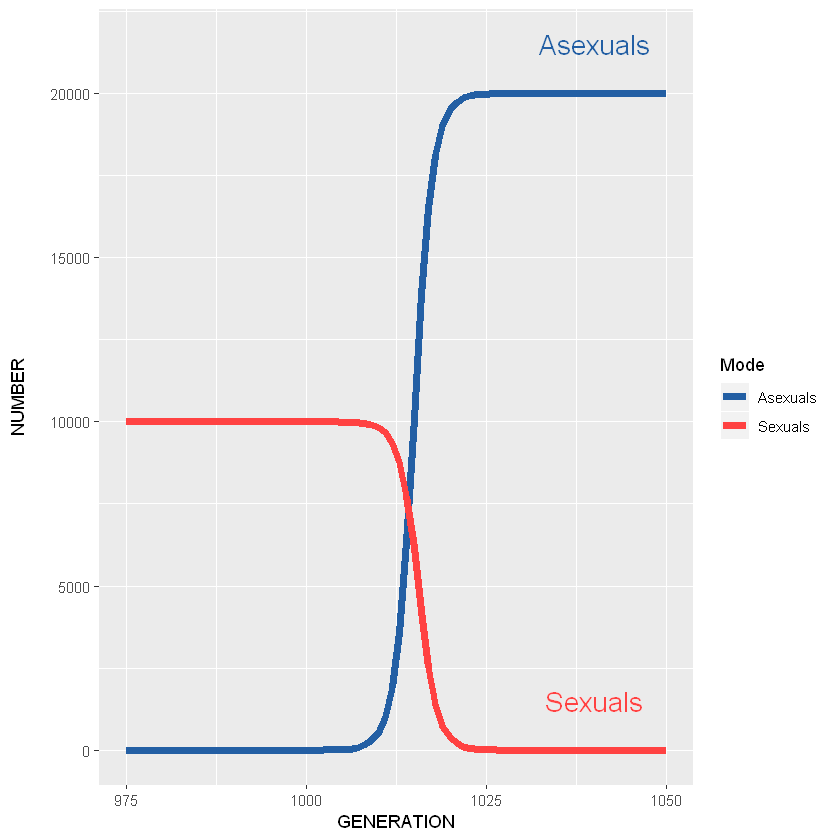

In [6]:
library(ggplot2)

Fig12 <- data.frame("Generation" = time, "Number" = outAsex, "Mode" = rep("Asexuals", length(outAsex)))
Fig12s <- data.frame("Generation" = time, "Number" = outSex, "Mode" = rep("Sexuals", length(outSex)))
Fig12 <- rbind(Fig12, Fig12s)

ggplot(Fig12, aes(x=Generation, y=Number, color=Mode)) +
  geom_line(size=2) +
  scale_x_continuous(name="GENERATION",  limits =c(975, 1050), breaks=seq(975, 1050, 25)) + 
  scale_y_continuous(name="NUMBER\n", limits = c(0, 21500)) +
  scale_color_manual(values = c(Asexuals = "#235FA4", Sexuals = "#FF4242"))  +
  annotate(geom = "text", x= 1040, y = 21500, label = "Asexuals", color = "#235FA4", size = 6) +
  annotate(geom = "text", x= 1040, y = 1500, label = "Sexuals", color = "#FF4242", size = 6) 